In [ ]:
#open file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving milk.csv to milk (6).csv
User uploaded file "milk (6).csv" with length 23090 bytes


In [ ]:
#print first 10 rows of the dataset
! head milk.csv

pH,Temprature,Taste,Odor,Fat ,Turbidity,Colour,Grade
6.6,35,1,0,1,0,254,1
6.6,36,0,1,0,1,253,1
8.5,70,1,1,1,1,246,0
9.5,34,1,1,0,1,255,0
6.6,37,0,0,0,0,255,1
6.6,37,1,1,1,1,255,1
5.5,45,1,0,1,1,250,0
4.5,60,0,1,1,1,250,0
8.1,66,1,0,1,1,255,0


In [ ]:
#import dataset
import numpy as np

In [ ]:
dataset = np.loadtxt('milk.csv', delimiter = ",", skiprows = 1)

In [ ]:
#get dataset shape(rows & columns)
print(dataset.shape)

(1059, 8)


In [ ]:
#convert values to float
from numpy.core.arrayprint import set_printoptions
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}" .format(x)})
print(dataset[0:5, :])

[[6.60 35.00 1.00 0.00 1.00 0.00 254.00 1.00]
 [6.60 36.00 0.00 1.00 0.00 1.00 253.00 1.00]
 [8.50 70.00 1.00 1.00 1.00 1.00 246.00 0.00]
 [9.50 34.00 1.00 1.00 0.00 1.00 255.00 0.00]
 [6.60 37.00 0.00 0.00 0.00 0.00 255.00 1.00]]


In [ ]:
#label dataset
dataset[dataset[:, -1] == 0, -1] = 0
dataset[dataset[:, -1] == 1, -1] = 1
print(dataset[0:5, :])

[[6.60 35.00 1.00 0.00 1.00 0.00 254.00 1.00]
 [6.60 36.00 0.00 1.00 0.00 1.00 253.00 1.00]
 [8.50 70.00 1.00 1.00 1.00 1.00 246.00 0.00]
 [9.50 34.00 1.00 1.00 0.00 1.00 255.00 0.00]
 [6.60 37.00 0.00 0.00 0.00 0.00 255.00 1.00]]


In [ ]:
#shuffle dataset
from IPython.utils.path import random
import random
np.random.shuffle(dataset)

In [ ]:
#data split
index_20percent = int(0.2 * len(dataset[:, 0]))
print(index_20percent)

211


In [ ]:
#set train and validation data
XVALIDATION = dataset[:index_20percent, :-1]
YVALIDATION = dataset[:index_20percent, -1]
XTRAIN = dataset[index_20percent:, 0:-1]
YTRAIN = dataset[index_20percent:, -1]

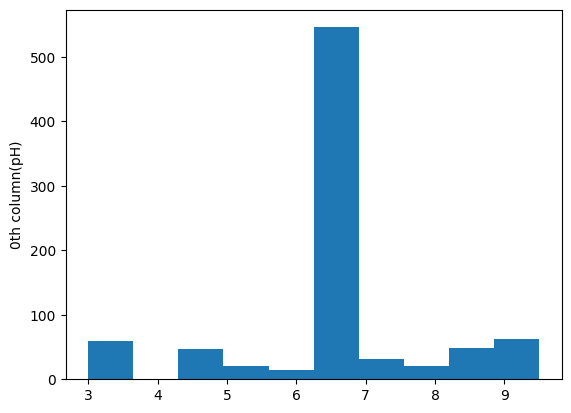

In [ ]:
#plot pH values
import matplotlib.pyplot as plt
plt.hist(XTRAIN[:, 0])
plt.ylabel('0th column(pH)')
plt.show()

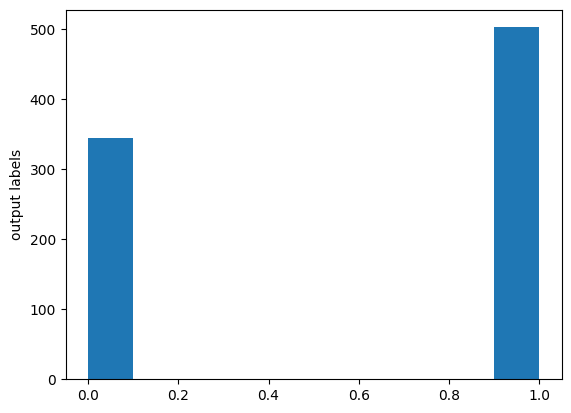

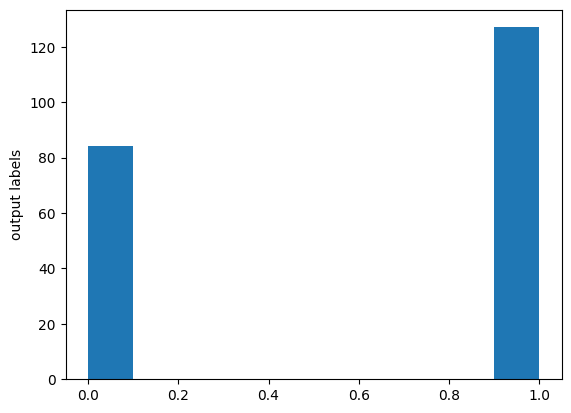

In [ ]:
#plot output labels
plt.hist(YTRAIN)
plt.ylabel('output labels')
plt.show()

plt.hist(YVALIDATION)
plt.ylabel('output labels')
plt.show()

In [ ]:
#standardize data
from numpy.core.fromnumeric import std
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XVALIDATION -= mean
XVALIDATION /= std

print(mean)
print(std)

[6.59 44.30 0.55 0.43 0.68 0.49 251.78]
[1.40 9.94 0.50 0.50 0.47 0.50 4.32]


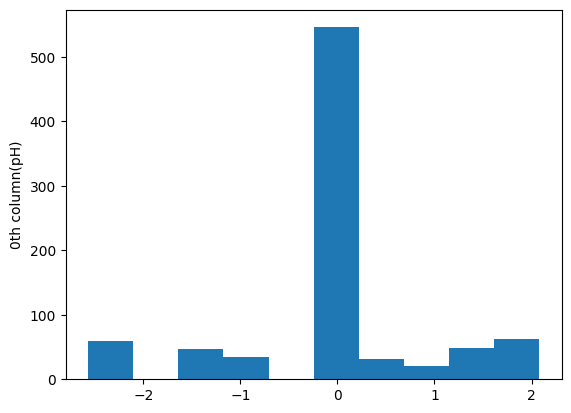

In [ ]:
#plot standardized data
plt.hist(XTRAIN[:, 0])
plt.ylabel('0th column(pH)')
plt.show()

In [ ]:
#print standardized data
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:3, ])
print(YTRAIN[0:3])
print(XVALIDATION[0:3, ])
print(YVALIDATION[0:3])

(848, 7)
(848,)
(211, 7)
(211,)
[[-0.71 0.57 -1.11 1.14 0.68 1.02 0.74]
 [0.15 0.07 -1.11 1.14 0.68 1.02 0.74]
 [-0.07 -0.63 0.90 -0.87 0.68 -0.98 0.74]]
[0.00 1.00 1.00]
[[0.15 -0.84 -1.11 1.14 0.68 -0.98 0.28]
 [0.15 -0.43 0.90 1.14 0.68 1.02 0.74]
 [1.72 -0.13 0.90 1.14 0.68 1.02 -0.87]]
[1.00 1.00 0.00]


In [ ]:
#initialize parameters
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

model = Sequential()
model.add(Dense(16, input_dim = len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#train model
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

from keras.callbacks import EarlyStopping
callback_b = EarlyStopping(monitor='val_loss', min_delta=0, mode='auto', patience=30, verbose=1)

history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=100, batch_size=10, callbacks=[callback_b])

Epoch 1/100
85/85 [==============================] - 1s 4ms/step - loss: 0.6295 - accuracy: 0.7028 - val_loss: 0.5517 - val_accuracy: 0.7773
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7830 - val_loss: 0.4339 - val_accuracy: 0.8436
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8113 - val_loss: 0.3652 - val_accuracy: 0.8436
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8561 - val_loss: 0.2916 - val_accuracy: 0.9289
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.2732 - accuracy: 0.9151 - val_loss: 0.2220 - val_accuracy: 0.9336
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9410 - val_loss: 0.1598 - val_accuracy: 0.9763
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.9658 - val_loss: 0.1144 - val_accuracy: 0.9858
Epoch 8/100
8

In [ ]:
#print parameters
print(history.params)

{'verbose': 1, 'epochs': 100, 'steps': 85}


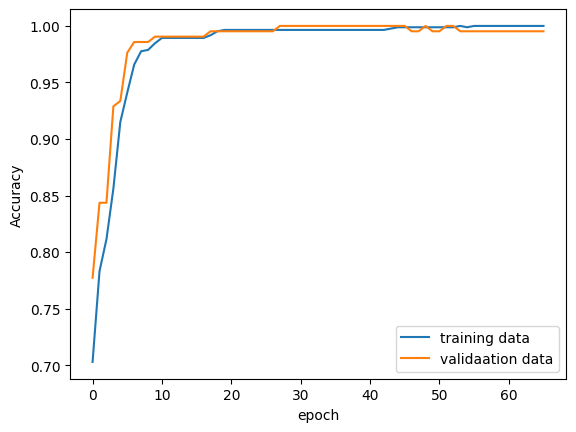

In [ ]:
#plot result
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validaation data'], loc='lower right')
plt.show()

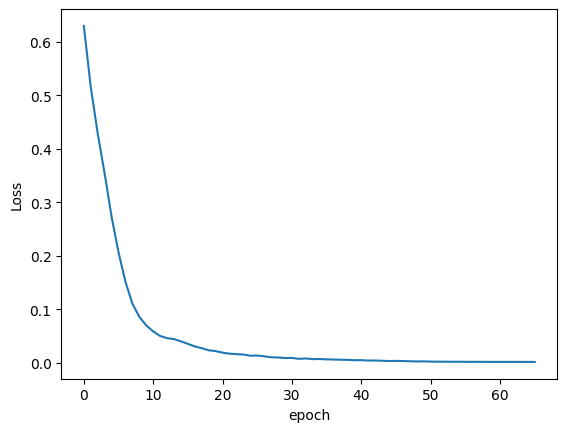

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

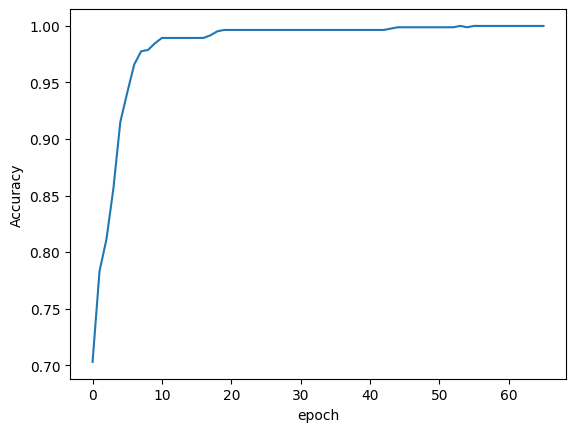

In [ ]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
#accuracy
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

27/27 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
['loss', 'accuracy']
[0.0020080902613699436, 1.0]

accuracy: 100.00%


In [ ]:
#evaluation
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print(XVALIDATION[0:5])
print(YVALIDATION[0:5])


7/7 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9953

accuracy: 99.53%
[[0.15 -0.84 -1.11 1.14 0.68 -0.98 0.28]
 [0.15 -0.43 0.90 1.14 0.68 1.02 0.74]
 [1.72 -0.13 0.90 1.14 0.68 1.02 -0.87]
 [-0.07 -0.84 -1.11 -0.87 0.68 -0.98 0.74]
 [-0.07 -0.63 0.90 1.14 0.68 1.02 0.74]]
[1.00 1.00 0.00 1.00 1.00]


In [ ]:
#prediction
prediction = model.predict(XVALIDATION)
print(prediction[0:10])

7/7 [==============================] - 0s 2ms/step
[[1.00]
 [1.00]
 [0.00]
 [1.00]
 [1.00]
 [0.00]
 [0.00]
 [0.00]
 [1.00]
 [1.00]]


In [ ]:
#Accuracy,Precision,Recall,F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(YVALIDATION, prediction.round())
precision = precision_score(YVALIDATION, prediction.round())
recall = recall_score(YVALIDATION, prediction.round())
f1score = f1_score(YVALIDATION, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f%%" % (f1score))

Accuracy: 99.53%
Precision: 100.00%
Recall: 99.21%
F1-score: 1.00%
